# Лабабаторная работа № 8

In [ ]:
from scipy import sparse
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

1. Самостоятельно реализовать BoW, TF-IDF

In [ ]:
class CountVectorizer:
    def __init__(self, max_df=1.0, min_df=1):
        self.vocab = {}
        self.max_df = max_df
        self.min_df = min_df

    def fit(self, text):
        doc_freq = {}
        for doc in text:
            for word in doc.split():
                if word not in doc_freq:
                    doc_freq[word] = 0
                doc_freq[word] += 1
                if ((type(self.max_df) is float and doc_freq[word] / len(text) <= self.max_df) or doc_freq[word] <= self.max_df) and ((type(self.min_df) and float or doc_freq[word] / len(text) >= self.min_df) or doc_freq[word] >= self.min_df):
                    if word not in self.vocab:
                        self.vocab[word] = len(self.vocab)

    def transform(self, text):
        X = sparse.csc_array(np.zeros((len(text), len(self.vocab))))
        for i, doc in enumerate(text):
            for word in doc.split():
                if word in self.vocab:
                    X[i, self.vocab[word]] += 1
        return X

    def fit_transform(self, text):
        self.fit(text)
        return self.transform(text)


In [ ]:
data = pd.read_csv("../data/spam.csv", sep=',')["v2"]

data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will _ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

print(vectorizer.vocab)
print(X)

c:\OmSTU\Python\ml\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


{'Go': 0, 'until': 1, 'jurong': 2, 'point,': 3, 'crazy..': 4, 'Available': 5, 'only': 6, 'in': 7, 'bugis': 8, 'n': 9, 'great': 10, 'world': 11, 'la': 12, 'e': 13, 'buffet...': 14, 'Cine': 15, 'there': 16, 'got': 17, 'amore': 18, 'wat...': 19, 'Ok': 20, 'lar...': 21, 'Joking': 22, 'wif': 23, 'u': 24, 'oni...': 25, 'Free': 26, 'entry': 27, '2': 28, 'a': 29, 'wkly': 30, 'comp': 31, 'to': 32, 'win': 33, 'FA': 34, 'Cup': 35, 'final': 36, 'tkts': 37, '21st': 38, 'May': 39, '2005.': 40, 'Text': 41, '87121': 42, 'receive': 43, 'question(std': 44, 'txt': 45, "rate)T&C's": 46, 'apply': 47, "08452810075over18's": 48, 'U': 49, 'dun': 50, 'say': 51, 'so': 52, 'early': 53, 'hor...': 54, 'c': 55, 'already': 56, 'then': 57, 'say...': 58, 'Nah': 59, 'I': 60, "don't": 61, 'think': 62, 'he': 63, 'goes': 64, 'usf,': 65, 'lives': 66, 'around': 67, 'here': 68, 'though': 69, 'FreeMsg': 70, 'Hey': 71, 'darling': 72, "it's": 73, 'been': 74, '3': 75, "week's": 76, 'now': 77, 'and': 78, 'no': 79, 'word': 80, 'ba

In [ ]:
class TfidfVectorizer:
    def __init__(self):
        self.vocab = {}
        self.idf = {}
        self.doc_count = 0

    def fit(self, X : list):
        self.doc_count = len(X)
        for doc in X:
            for word in doc.split():
                if word not in self.vocab:
                    self.vocab[word] = 1
                else:
                    self.vocab[word] += 1

        for word in self.vocab:
            self.idf[word] = np.log(self.doc_count / (1 + self.vocab[word]))

    def transform(self, X):
        tfidf_matrix = []
        for doc in X:
            tfidf_vector = []
            for word in self.vocab:
                tf = doc.split().count(word)/self.vocab[word]
                tfidf = tf * self.idf[word]
                tfidf_vector.append(tfidf)
            tfidf_matrix.append(tfidf_vector)
        return sparse.csc_array(np.array(tfidf_matrix))

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

print(vectorizer.vocab)
print(X)

{'Go': 14, 'until': 26, 'jurong': 1, 'point,': 1, 'crazy..': 1, 'Available': 3, 'only': 147, 'in': 798, 'bugis': 4, 'n': 137, 'great': 75, 'world': 17, 'la': 2, 'e': 71, 'buffet...': 1, 'Cine': 1, 'there': 118, 'got': 204, 'amore': 1, 'wat...': 12, 'Ok': 97, 'lar...': 18, 'Joking': 1, 'wif': 26, 'u': 692, 'oni...': 2, 'Free': 39, 'entry': 25, '2': 453, 'a': 1327, 'wkly': 10, 'comp': 10, 'to': 2134, 'win': 38, 'FA': 4, 'Cup': 3, 'final': 13, 'tkts': 4, '21st': 3, 'May': 16, '2005.': 3, 'Text': 42, '87121': 4, 'receive': 34, 'question(std': 2, 'txt': 75, "rate)T&C's": 2, 'apply': 15, "08452810075over18's": 2, 'U': 299, 'dun': 46, 'say': 72, 'so': 294, 'early': 24, 'hor...': 2, 'c': 44, 'already': 45, 'then': 146, 'say...': 3, 'Nah': 7, 'I': 1466, "don't": 110, 'think': 113, 'he': 127, 'goes': 26, 'usf,': 2, 'lives': 2, 'around': 53, 'here': 75, 'though': 15, 'FreeMsg': 5, 'Hey': 76, 'darling': 4, "it's": 53, 'been': 120, '3': 55, "week's": 4, 'now': 190, 'and': 857, 'no': 124, 'word': 22

2. Решить задачу классификации с понижением размерности. Использовать самостоятельно реализованные модели из предыдущих ЛР.

In [ ]:
vectorizer = TfidfVectorizer()
data = pd.read_csv("../data/spam.csv", sep=',')
X, y = vectorizer.fit_transform(data["v2"]), data["v1"]

In [ ]:
vectorizer.vocab

{'Go': 14,
 'until': 26,
 'jurong': 1,
 'point,': 1,
 'crazy..': 1,
 'Available': 3,
 'only': 147,
 'in': 798,
 'bugis': 4,
 'n': 137,
 'great': 75,
 'world': 17,
 'la': 2,
 'e': 71,
 'buffet...': 1,
 'Cine': 1,
 'there': 118,
 'got': 204,
 'amore': 1,
 'wat...': 12,
 'Ok': 97,
 'lar...': 18,
 'Joking': 1,
 'wif': 26,
 'u': 692,
 'oni...': 2,
 'Free': 39,
 'entry': 25,
 '2': 453,
 'a': 1327,
 'wkly': 10,
 'comp': 10,
 'to': 2134,
 'win': 38,
 'FA': 4,
 'Cup': 3,
 'final': 13,
 'tkts': 4,
 '21st': 3,
 'May': 16,
 '2005.': 3,
 'Text': 42,
 '87121': 4,
 'receive': 34,
 'question(std': 2,
 'txt': 75,
 "rate)T&C's": 2,
 'apply': 15,
 "08452810075over18's": 2,
 'U': 299,
 'dun': 46,
 'say': 72,
 'so': 294,
 'early': 24,
 'hor...': 2,
 'c': 44,
 'already': 45,
 'then': 146,
 'say...': 3,
 'Nah': 7,
 'I': 1466,
 "don't": 110,
 'think': 113,
 'he': 127,
 'goes': 26,
 'usf,': 2,
 'lives': 2,
 'around': 53,
 'here': 75,
 'though': 15,
 'FreeMsg': 5,
 'Hey': 76,
 'darling': 4,
 "it's": 53,
 'been'

In [ ]:
class PCA_new():
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        cov_matrix = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[0:self.n_components]

        return self

    def transform(self, X):
        X = X - self.mean

        return np.dot(X, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
pca = PCA_new(n_components=2)
downfeatured = pca.fit_transform(X).T

In [ ]:
colors = data['v1'].replace({'ham': 0, 'spam': 1})
colors

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

c:\OmSTU\Python\ml\venv\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


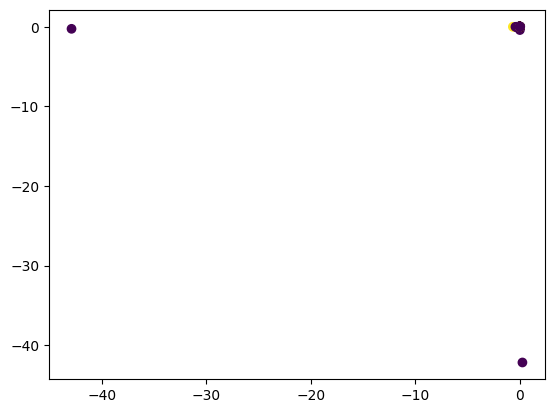

In [ ]:
plt.scatter(x=downfeatured[0], y=downfeatured[1], c=colors);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(downfeatured.T, colors, test_size=0.2, random_state=42)

In [ ]:
class k_nn:
    def __init__(self, X_train, y_train):
        self.xtr = X_train
        self.ytr = y_train
    def predict(self, X_test, k):
        pred = np.array([])
        X_test = X_test
        for i in range(X_test.shape[0]):
            distances = pd.Series(pow(pow(self.xtr - X_test[i], 2).sum(axis = 1), 1/2)).sort_values()[:k]
            values = []
            for j in distances.index:
                values.append(self.ytr[j])
            pred = np.append(pred, bool(np.bincount(np.array(values)).argmax()))
        return pred

In [ ]:
knn = k_nn(X_train, colors)
y_pred = knn.predict(X_test, 1)

In [ ]:
class Metrics:
    def __init__(self, test, pred):
        self.TP = 0
        for i, j in zip(test, pred):
            if i == j == True:
                self.TP += 1
        self.FN = np.count_nonzero(test == True) - self.TP
        self.FP = np.count_nonzero(pred == True) - self.TP
        self.TN = test.size - self.TP - self.FP - self.FN
        self.P = self.TP + self.FN
        self.N = self.TN + self.FP
    def conf_matr(self):
        print('%-7s %-7s' % ('ㅤ', 'реальность'))
        print('%-7s %5d %5d' % ('прог', self.TP, self.FP))
        print('%-7s %5d %5d' % ('ноз', self.FN, self.TN))
    def accuracy(self):
        return (self.TP + self.TN)/(self.P + self.N)
    def precision(self):
        return self.TP/(self.TP + self.FP)
    def recall(self):
        return self.TP/self.P
    def F1(self):
        return 2/(1/self.precision() + 1/self.recall())

In [ ]:
knn_m = Metrics(y_test, y_pred)
knn_m.conf_matr()
print(knn_m.accuracy())
print(knn_m.precision())
print(knn_m.recall())
print(knn_m.F1())

ㅤ       реальность
прог       18   112
ноз       132   853
0.7811659192825112
0.13846153846153847
0.12
0.1285714285714286


3. Решить задачу мягкой кластеризации (ТМ) с помощью LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = pd.read_csv("../data/spam.csv", sep=',')['v2']

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=5,
                                max_features=1000,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data)

In [ ]:
lda = LatentDirichletAllocation(n_components=10, max_iter=20,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf)

In [ ]:
for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx}")
        print(" ".join([tf_vectorizer.get_feature_names_out()[i]
                        for i in topic.argsort()[:-11:-1]]))

Topic 0
happy thanks day went wish lunch sir birthday pa forgot
Topic 1
free ur txt text mobile stop www msg uk win
Topic 2
claim won prize number new reply urgent contact cash customer
Topic 3
gt lt come min buy yeah sure live got like
Topic 4
going pls right say ve send great pick help try
Topic 5
ok lor time wat work got night meet ask oh
Topic 6
good da dear message day today way nice fine waiting
Topic 7
just like hi hope day yes hey time come feel
Topic 8
ll know dont later sorry ur love amp life let
Topic 9
want don did think tell need home babe soon love
